# Covid-19-India-Data Analysis

## Loading the Required Libraries

In [1]:
## Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from random import randint

from math import sqrt
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
from sklearn.model_selection import train_test_split

## 1. Data Collection

The number of new cases are increasing day by day around the world. This dataset has information from the states and union territories of India at daily level.The data on covid-19 in India is collected from https://www.mohfw.gov.in/ website, API provided by https://www.covid19india.org/ and https://github.com/imdevskp/covid-19-india-data
The data set is about the number of confirmed, death recovered, new cases and new recovery data by state level.   

###  Loading the Dataset

In [2]:
## Load data from IndiaCovidData.xlsx file to data set covid_data

covid_data=pd.read_excel("IndiaCovidData.xlsx")

## Show first five rows in the Covid_data data set

covid_data.head()

,Date,Name of State / UT,Latitude,Longitude,Total Confirmed cases,Death,Cured/Discharged/Migrated,New cases,New deaths,New recovered
0,2020-01-30,Kerala,10.8505,76.2711,1,0,0,0,0,0
1,2020-01-31,Kerala,10.8505,76.2711,1,0,0,0,0,0
2,2020-02-01,Kerala,10.8505,76.2711,2,0,0,1,0,0
3,2020-02-02,Kerala,10.8505,76.2711,3,0,0,1,0,0
4,2020-02-03,Kerala,10.8505,76.2711,3,0,0,0,0,0


####  Check the basic details of the Covid dataset 

In [3]:
covid_data.shape

(4692, 10)

In [4]:
covid_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4692 entries, 0 to 4691
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Date                       4692 non-null   datetime64[ns]
 1   Name of State / UT         4692 non-null   object        
 2   Latitude                   4692 non-null   float64       
 3   Longitude                  4692 non-null   float64       
 4   Total Confirmed cases      4692 non-null   int64         
 5   Death                      4692 non-null   object        
 6   Cured/Discharged/Migrated  4692 non-null   int64         
 7   New cases                  4692 non-null   int64         
 8   New deaths                 4692 non-null   int64         
 9   New recovered              4692 non-null   int64         
dtypes: datetime64[ns](1), float64(2), int64(5), object(2)
memory usage: 366.7+ KB


Here, We'll be trying to make a model which can Predict the `Death` count.

## 2. Data Preprocessing on Covid Data

In [5]:
# Since Deaths column is Object we convert it to Int

covid_data.loc[covid_data['Death'] == '0#']
covid_data.drop(2241,axis=0, inplace=True)
covid_data["Death"] = covid_data["Death"].astype(str).astype(int)

In [6]:
covid_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4691 entries, 0 to 4691
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Date                       4691 non-null   datetime64[ns]
 1   Name of State / UT         4691 non-null   object        
 2   Latitude                   4691 non-null   float64       
 3   Longitude                  4691 non-null   float64       
 4   Total Confirmed cases      4691 non-null   int64         
 5   Death                      4691 non-null   int32         
 6   Cured/Discharged/Migrated  4691 non-null   int64         
 7   New cases                  4691 non-null   int64         
 8   New deaths                 4691 non-null   int64         
 9   New recovered              4691 non-null   int64         
dtypes: datetime64[ns](1), float64(2), int32(1), int64(5), object(1)
memory usage: 384.8+ KB


In [7]:
covid_data.describe()

,Latitude,Longitude,Total Confirmed cases,Death,Cured/Discharged/Migrated,New cases,New deaths,New recovered
count,4691.000000,4691.000000,4691.000000,4691.000000,4691.000000,4691.000000,4691.0,4691.000000
mean,23.187724,81.452187,11396.348540,291.280750,6909.601151,418.732253,0.0,283.129397
std,6.634589,6.960175,37212.197127,1213.817206,23392.947897,1259.868384,0.0,948.017851
min,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.0,-1.000000
25%,18.112400,76.271100,39.000000,0.000000,9.000000,1.000000,0.0,0.000000
50%,23.940800,79.019300,619.000000,5.000000,198.000000,26.000000,0.0,8.000000
75%,28.218000,85.313100,5233.000000,68.500000,2739.000000,210.500000,0.0,119.000000
max,34.299600,94.727800,468265.000000,16476.000000,305521.000000,18366.000000,0.0,13401.000000


The describe() method is used to get a summary of numeric values in the covid_data dataset. It calculates the mean, standard deviation, minimum value, maximum value, 1st percentile, 2nd percentile, 3rd percentile of the columns with numeric values. It also counts the number of variables in the dataset.

<AxesSubplot:>

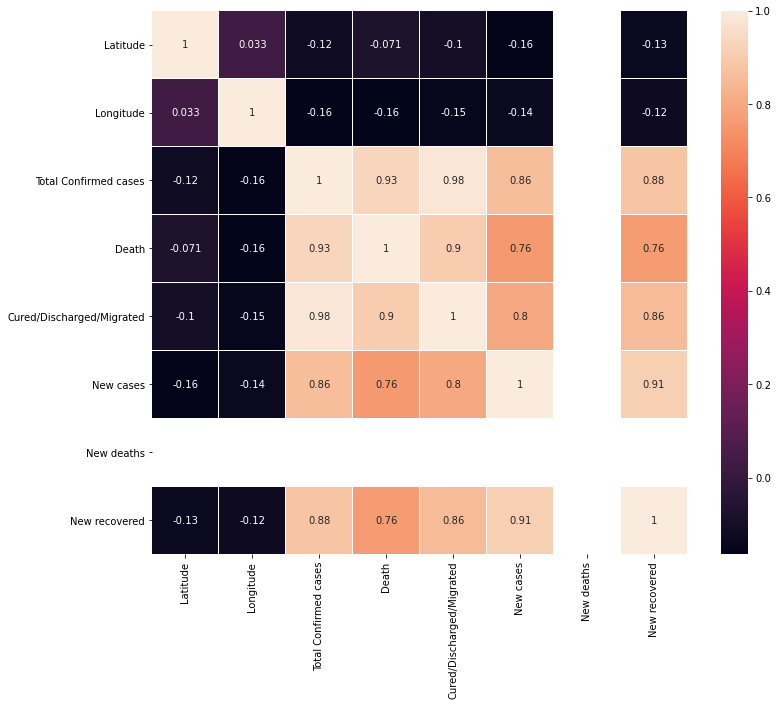

In [8]:
# Checking and plotting Correlation :
corrmatrix=covid_data.corr()
plt.subplots(figsize=(12,10))
sns.heatmap(corrmatrix,annot=True,linewidth=0.2)

In [9]:
# Checking for Null Values
covid_data.isnull().sum()

Date                         0
Name of State / UT           0
Latitude                     0
Longitude                    0
Total Confirmed cases        0
Death                        0
Cured/Discharged/Migrated    0
New cases                    0
New deaths                   0
New recovered                0
dtype: int64

> No null values are present in the Data set

#### `Feature Reduction on Covid Data `

In [10]:
## nunique() method will print the counts of unique numbers in each column
covid_data.nunique()

Date                          186
Name of State / UT             40
Latitude                       36
Longitude                      32
Total Confirmed cases        2570
Death                         838
Cured/Discharged/Migrated    2143
New cases                    1058
New deaths                      1
New recovered                 901
dtype: int64

Columns that have a single observation or value are probably useless for modeling.
These columns or predictors are referred to zero-variance predictors as if we measured the variance (average value from the mean), it would be zero. In the covid dataset we have 'New Deaths' column with a dingle value. So we can drop that column for a better performance.

In [11]:
# Dropping the New deaths along with the Latitude and Longitude column

covid_data=covid_data.drop(['New deaths','Latitude','Longitude'], axis = 1)
covid_data.shape

(4691, 7)

#### `Performing Feature engineering and creating a new feature`

In [12]:
# Creating a new column
covid_data["Active_cases"] = covid_data["Total Confirmed cases"] - (covid_data["Cured/Discharged/Migrated"] + covid_data["Death"])

In [13]:
# creating a duplicate data set

covid_data1 = covid_data.copy()

In [14]:
covid_data.duplicated().value_counts()

False    4691
dtype: int64

> We have no duplicate values

<AxesSubplot:>

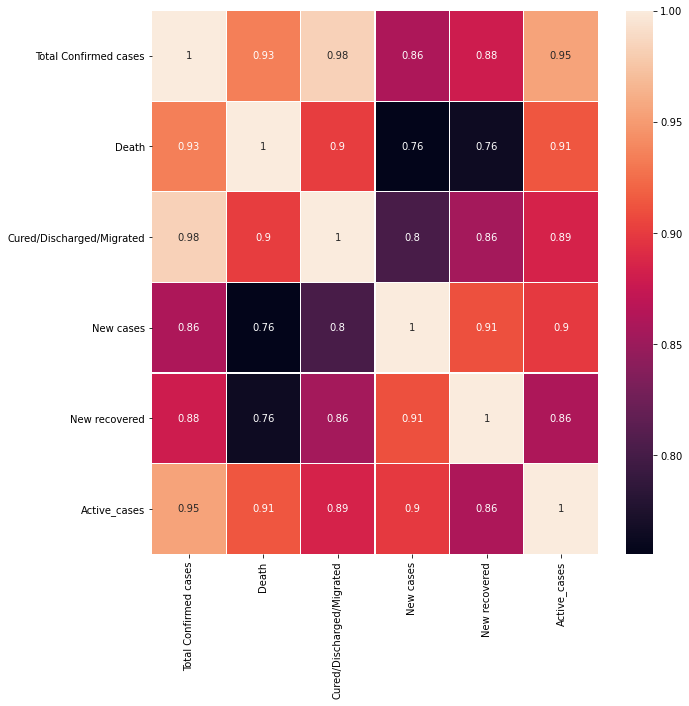

In [15]:
# Replotting the Co-relation matrix. 

corrmatrix=covid_data.corr()
plt.subplots(figsize=(10,10))
sns.heatmap(corrmatrix,annot=True,linewidth=0.2)

> We can see a **high positive correlation** btw the features : `Total Confirmed cases`,`Cured/Discharged/Migrated`, `Active cases` with the `Death` column.

> `New cases`,`New recovered`, are also having positive co-relation with Death column

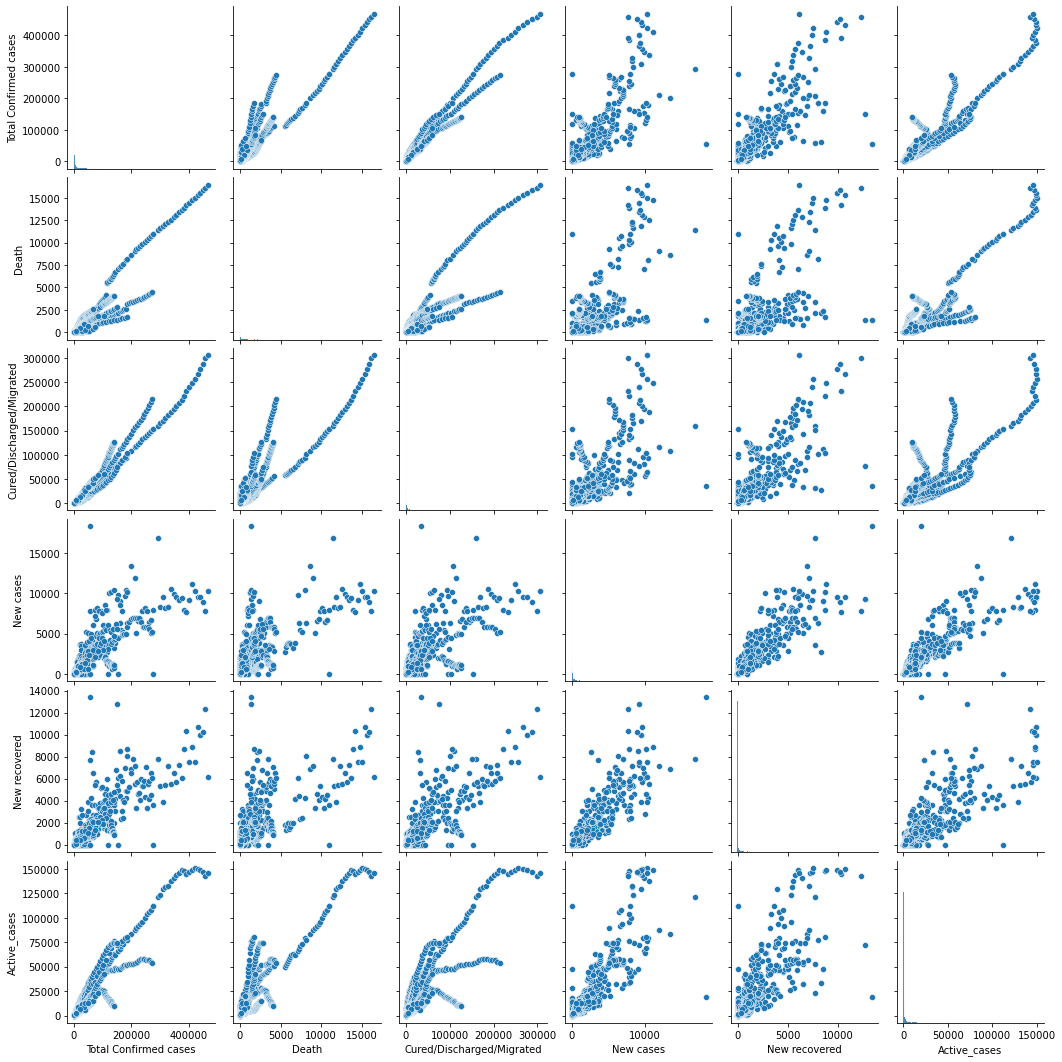

In [16]:
sns.pairplot(covid_data)

### Creating a `RandomForest Regression` model before removing the outliers.


* **Since RF are immune to outliers in dataset**

In [17]:
covid_data.head()

,Date,Name of State / UT,Total Confirmed cases,Death,Cured/Discharged/Migrated,New cases,New recovered,Active_cases
0,2020-01-30,Kerala,1,0,0,0,0,1
1,2020-01-31,Kerala,1,0,0,0,0,1
2,2020-02-01,Kerala,2,0,0,1,0,2
3,2020-02-02,Kerala,3,0,0,1,0,3
4,2020-02-03,Kerala,3,0,0,0,0,3


In [18]:
covid_data.columns

Index(['Date', 'Name of State / UT', 'Total Confirmed cases', 'Death',
       'Cured/Discharged/Migrated', 'New cases', 'New recovered',
       'Active_cases'],
      dtype='object')

In this model we'll be trying to predict the future **Death** count. 

In [19]:
x1 = covid_data.drop(["Date",'Name of State / UT','Death'], axis=1)
y1 = covid_data["Death"]

### 

In [20]:
# Splitting our dataset into testing and training data

x1_train,x1_test,y1_train,y1_test = train_test_split(x1,y1,test_size=0.25,random_state=150)

# Importing our Random Forest Regressor library

from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor()
rf_model.fit(x1_train,y1_train)
rf_pred = rf_model.predict(x1_test)

rmse = sqrt(mean_squared_error(y1_test,rf_pred))

print("MAE = ", mean_absolute_error(y1_test,rf_pred))
print("MSE = ", mean_squared_error(y1_test,rf_pred))
print("RMSE = ", rmse)
print("R2 Value = ", r2_score(y1_test,rf_pred))

MAE =  67.05864450127876
MSE =  58314.58671602729
RMSE =  241.48413346641905
R2 Value =  0.9668370632468067


In [21]:
rf_model = RandomForestRegressor(n_estimators=500,max_depth=20 )
rf_model.fit(x1_train,y1_train)
rf_pred = rf_model.predict(x1_test)

rmse = sqrt(mean_squared_error(y1_test,rf_pred))

print("MAE = ", mean_absolute_error(y1_test,rf_pred))
print("MSE = ", mean_squared_error(y1_test,rf_pred))
print("RMSE = ", rmse)
print("R2 Value = ", r2_score(y1_test,rf_pred))

MAE =  67.03375474032731
MSE =  59645.53645355134
RMSE =  244.2243567983164
R2 Value =  0.9660801651111459


### Similarly making a `Extreme Gradient Boosting` XGB model

In [22]:
# Importing the libraries

import xgboost as xgb
from xgboost import XGBRegressor

xgb = XGBRegressor()
xgb.fit(x1_train,y1_train)
xgb_pred = xgb.predict(x1_test)

rmse = sqrt(mean_squared_error(y1_test,xgb_pred))

print("MAE = ", mean_absolute_error(y1_test,xgb_pred))
print("MSE = ", mean_squared_error(y1_test,xgb_pred))
print("RMSE = ", rmse)
print("R2 Value = ", r2_score(y1_test,xgb_pred))

MAE =  68.37093408000858
MSE =  66430.84217430756
RMSE =  257.74181301121394
R2 Value =  0.9622214279213533


> From the above models it seems that we can use the Random Forest Regressor & XGB models for the death prediction models (even if outliers are present in the data). 

> But before being conclusive about it we'll check to see if a better model exists.

### Analyzing Outliers for various features

<AxesSubplot:>

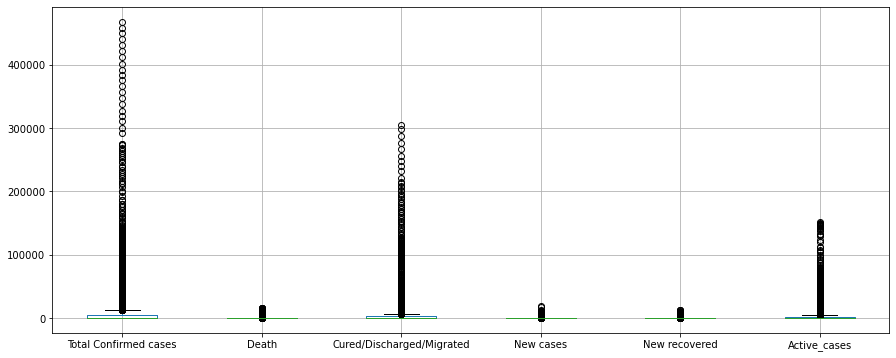

In [23]:
##outlier Analysis
plt.figure(figsize=(15,6))
covid_data1.boxplot()
## This will form a Box-plot for the skewed feature of specified columns

Here `Total Confirmed Cases`, `Death` , `Cured/Discharged/Migrated`, `New cases`, `New Recovered` and `Active cases` shows some outliers. 

Among these attributes `Total Confirmed cases`, `Cured/Discharged/Migrated` and `Active_cases`  shows something large.

#### Handling the Outliers

#### 1.) For `Total Confirmed cases`

In [24]:
## Inter Quartile Range approach to finding the outliers is the most commonly used and most trusted approach.

Q1 = np.percentile(covid_data1['Total Confirmed cases'], 25,
                   interpolation = 'midpoint')
 
Q3 = np.percentile(covid_data1['Total Confirmed cases'], 75,
                   interpolation = 'midpoint')
IQR = Q3 - Q1

print("First Quantile:",Q1)
print("Third Quantile:",Q3)
print("IQR:",IQR)

lower = Q1 - (1.5*IQR)
upper= Q3 + (1.5*IQR)

print("Upper limit:",upper)
print("Lower limit:",lower)

index=covid_data1['Total Confirmed cases'][(covid_data1['Total Confirmed cases']>upper)|(covid_data1['Total Confirmed cases']<lower)].index
covid_data1.drop(index,inplace=True)
covid_data1.shape

First Quantile: 39.0
Third Quantile: 5233.0
IQR: 5194.0
Upper limit: 13024.0
Lower limit: -7752.0


(3937, 8)

#### 2.) For `Cured/Discharged/Migrated`

In [25]:
Q1 = np.percentile(covid_data1['Cured/Discharged/Migrated'], 25,
                   interpolation = 'midpoint')
 
Q3 = np.percentile(covid_data1['Cured/Discharged/Migrated'], 75,
                   interpolation = 'midpoint')
IQR = Q3 - Q1

print("First Quantile:",Q1)
print("Third Quantile:",Q3)
print("IQR:",IQR)

lower = Q1 - (1.5*IQR)
upper= Q3 + (1.5*IQR)

print("Upper limit:",upper)
print("Lower limit:",lower)

index = covid_data1['Cured/Discharged/Migrated'][(covid_data1['Cured/Discharged/Migrated']>upper)|(covid_data1['Cured/Discharged/Migrated']<lower)].index
covid_data1.drop(index,inplace=True)
covid_data1.shape

First Quantile: 3.0
Third Quantile: 869.0
IQR: 866.0
Upper limit: 2168.0
Lower limit: -1296.0


(3406, 8)

#### 3.) For `Active_cases`

In [26]:
Q1 = np.percentile(covid_data1['Active_cases'], 25,
                   interpolation = 'midpoint')
 
Q3 = np.percentile(covid_data1['Active_cases'], 75,
                   interpolation = 'midpoint')
IQR = Q3 - Q1

print("First Quantile:",Q1)
print("Third Quantile:",Q3)
print("IQR:",IQR)

lower = Q1 - (1.5*IQR)
upper= Q3 + (1.5*IQR)

print("Upper limit:",upper)
print("Lower limit:",lower)

index=covid_data1['Active_cases'][(covid_data1['Active_cases']>upper)|(covid_data1['Active_cases']<lower)].index
covid_data1.drop(index,inplace=True)
covid_data1.shape

First Quantile: 9.0
Third Quantile: 471.5
IQR: 462.5
Upper limit: 1165.25
Lower limit: -684.75


(3091, 8)

#### 4.) For `Death`

In [27]:
Q1 = np.percentile(covid_data1['Death'], 25,
                   interpolation = 'midpoint')
 
Q3 = np.percentile(covid_data1['Death'], 75,
                   interpolation = 'midpoint')
IQR = Q3 - Q1

print("First Quantile:",Q1)
print("Third Quantile:",Q3)
print("IQR:",IQR)

lower = Q1 - (1.5*IQR)
upper= Q3 + (1.5*IQR)

print("Upper limit:",upper)
print("Lower limit:",lower)

index=covid_data1['Death'][(covid_data1['Death']>upper)|(covid_data1['Death']<lower)].index
covid_data1.drop(index,inplace=True)
covid_data1.shape

First Quantile: 0.0
Third Quantile: 4.0
IQR: 4.0
Upper limit: 10.0
Lower limit: -6.0


(2649, 8)

#### 5.) For `New cases`

In [28]:
Q1 = np.percentile(covid_data1['New cases'], 25,
                   interpolation = 'midpoint')
 
Q3 = np.percentile(covid_data1['New cases'], 75,
                   interpolation = 'midpoint')
IQR = Q3 - Q1

print("First Quantile:",Q1)
print("Third Quantile:",Q3)
print("IQR:",IQR)

lower = Q1 - (1.5*IQR)
upper= Q3 + (1.5*IQR)

print("Upper limit:",upper)
print("Lower limit:",lower)

index=covid_data1['New cases'][(covid_data1['New cases']>upper)|(covid_data1['New cases']<lower)].index
covid_data1.drop(index,inplace=True)
covid_data1.shape

First Quantile: 0.0
Third Quantile: 16.0
IQR: 16.0
Upper limit: 40.0
Lower limit: -24.0


(2316, 8)

#### 6.) For `New recovered`

In [29]:
Q1 = np.percentile(covid_data1['New recovered'], 25,
                   interpolation = 'midpoint')
 
Q3 = np.percentile(covid_data1['New recovered'], 75,
                   interpolation = 'midpoint')
IQR = Q3 - Q1

print("First Quantile:",Q1)
print("Third Quantile:",Q3)
print("IQR:",IQR)

lower = Q1 - (1.5*IQR)
upper= Q3 + (1.5*IQR)

print("Upper limit:",upper)
print("Lower limit:",lower)

index=covid_data1['New recovered'][(covid_data1['New recovered']>upper)|(covid_data1['New recovered']<lower)].index
covid_data1.drop(index,inplace=True)
covid_data1.shape

First Quantile: 0.0
Third Quantile: 2.0
IQR: 2.0
Upper limit: 5.0
Lower limit: -3.0


(1950, 8)

<AxesSubplot:>

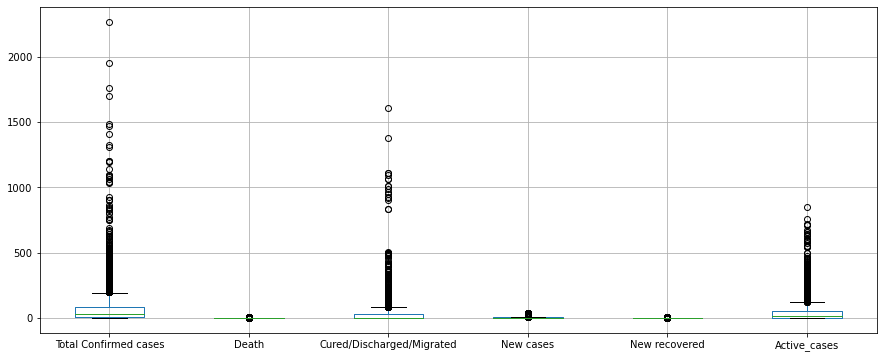

In [30]:
# Redoing the outlier Analysis

plt.figure(figsize=(15,6))
covid_data1.boxplot()

After handling the outliers our dataset have **1950** rows and **10** columns

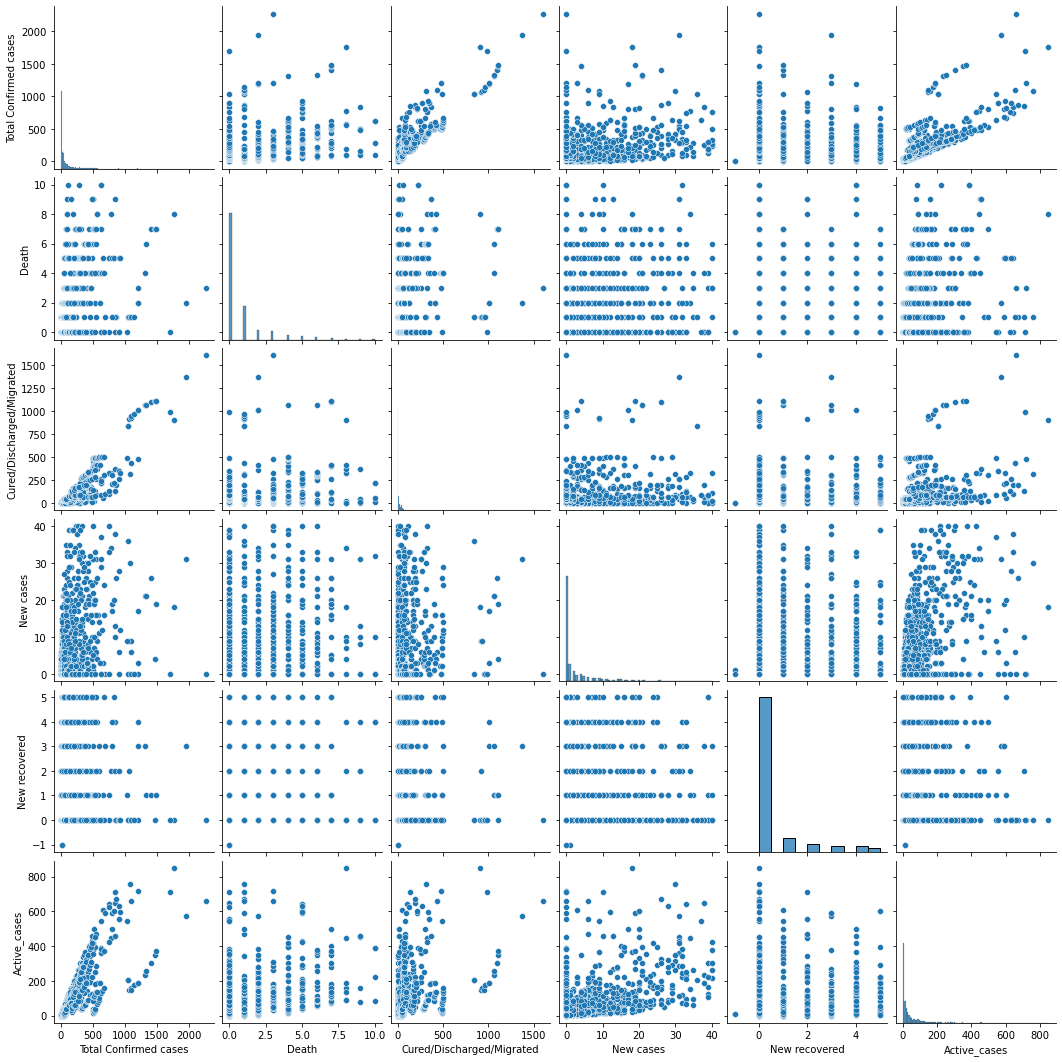

In [31]:
sns.pairplot(covid_data1)

In [32]:
covid_data.head()

,Date,Name of State / UT,Total Confirmed cases,Death,Cured/Discharged/Migrated,New cases,New recovered,Active_cases
0,2020-01-30,Kerala,1,0,0,0,0,1
1,2020-01-31,Kerala,1,0,0,0,0,1
2,2020-02-01,Kerala,2,0,0,1,0,2
3,2020-02-02,Kerala,3,0,0,1,0,3
4,2020-02-03,Kerala,3,0,0,0,0,3


In [33]:
# performing MinMax scaling

from sklearn.preprocessing import MinMaxScaler
from sklearn import preprocessing

# features= covid_data1.iloc[:,[4,6,7,8]].values
# features.shape

In [34]:
covid_data1

,Date,Name of State / UT,Total Confirmed cases,Death,Cured/Discharged/Migrated,New cases,New recovered,Active_cases
0,2020-01-30,Kerala,1,0,0,0,0,1
1,2020-01-31,Kerala,1,0,0,0,0,1
2,2020-02-01,Kerala,2,0,0,1,0,2
3,2020-02-02,Kerala,3,0,0,1,0,3
4,2020-02-03,Kerala,3,0,0,0,0,3
...,...,...,...,...,...,...,...,...
4604,2020-08-04,Ladakh,1485,7,1109,19,1,369
4608,2020-08-04,Meghalaya,902,5,264,28,0,633
4678,2020-08-06,Meghalaya,929,5,330,12,0,594
4679,2020-08-06,Mizoram,537,0,286,33,4,251


In [35]:
covid_data1.describe()

,Total Confirmed cases,Death,Cured/Discharged/Migrated,New cases,New recovered,Active_cases
count,1950.000000,1950.000000,1950.000000,1950.000000,1950.000000,1950.000000
mean,90.655897,0.819487,39.714359,3.834872,0.467692,50.122051
std,190.139338,1.607841,120.397771,7.322689,1.124261,97.642164
min,1.000000,0.000000,0.000000,0.000000,-1.000000,0.000000
25%,4.000000,0.000000,0.000000,0.000000,0.000000,2.000000
50%,27.000000,0.000000,3.000000,0.000000,0.000000,13.000000
75%,80.000000,1.000000,32.000000,4.000000,0.000000,50.000000
max,2268.000000,10.000000,1604.000000,40.000000,5.000000,850.000000


In [36]:
covid_data1.columns

Index(['Date', 'Name of State / UT', 'Total Confirmed cases', 'Death',
       'Cured/Discharged/Migrated', 'New cases', 'New recovered',
       'Active_cases'],
      dtype='object')

In [37]:
mms = MinMaxScaler()

covid_data1[['Total Confirmed cases', 'Death',
       'Cured/Discharged/Migrated', 'New cases', 'New recovered',
       'Active_cases']] = mms.fit_transform(covid_data1[['Total Confirmed cases', 'Death',
       'Cured/Discharged/Migrated', 'New cases', 'New recovered',
       'Active_cases']])
covid_data1

,Date,Name of State / UT,Total Confirmed cases,Death,Cured/Discharged/Migrated,New cases,New recovered,Active_cases
0,2020-01-30,Kerala,0.000000,0.0,0.000000,0.000,0.166667,0.001176
1,2020-01-31,Kerala,0.000000,0.0,0.000000,0.000,0.166667,0.001176
2,2020-02-01,Kerala,0.000441,0.0,0.000000,0.025,0.166667,0.002353
3,2020-02-02,Kerala,0.000882,0.0,0.000000,0.025,0.166667,0.003529
4,2020-02-03,Kerala,0.000882,0.0,0.000000,0.000,0.166667,0.003529
...,...,...,...,...,...,...,...,...
4604,2020-08-04,Ladakh,0.654610,0.7,0.691397,0.475,0.333333,0.434118
4608,2020-08-04,Meghalaya,0.397442,0.5,0.164589,0.700,0.166667,0.744706
4678,2020-08-06,Meghalaya,0.409352,0.5,0.205736,0.300,0.166667,0.698824
4679,2020-08-06,Mizoram,0.236436,0.0,0.178304,0.825,0.833333,0.295294


In [38]:
covid_data1.describe()

,Total Confirmed cases,Death,Cured/Discharged/Migrated,New cases,New recovered,Active_cases
count,1950.000000,1950.000000,1950.000000,1950.000000,1950.000000,1950.000000
mean,0.039548,0.081949,0.024760,0.095872,0.244615,0.058967
std,0.083873,0.160784,0.075061,0.183067,0.187377,0.114873
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.001323,0.000000,0.000000,0.000000,0.166667,0.002353
50%,0.011469,0.000000,0.001870,0.000000,0.166667,0.015294
75%,0.034848,0.100000,0.019950,0.100000,0.166667,0.058824
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## 3. Exploratory Data Anaysis on Covid Data set

### **3a.)** Performing some **Univariate analysis**

* 1) `Univariate` time series for **Total Confirmed cases**

[Note : We'll be making various analysis with our original dataset]

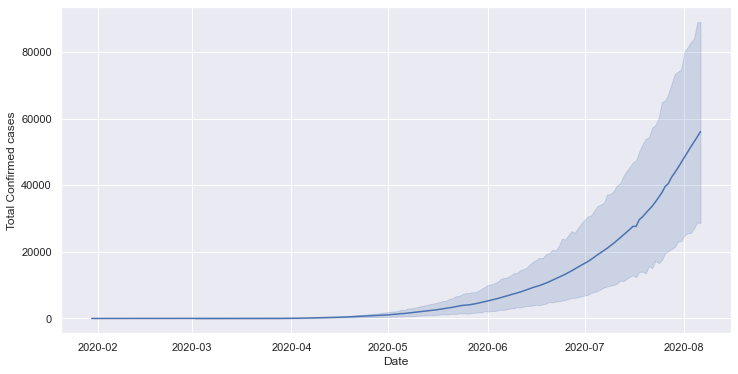

In [39]:
sns.set(rc = {'figure.figsize' : (12,6)})
sns.lineplot(x= "Date", y = "Total Confirmed cases", data = covid_data)
plt.show()

> We can see that the in the initial 4 months the cases were very few, However from the 5 th moth onwards there is a sharp increase in the number of cases.

* 2) `Univariate` time series for **Death** toll

<AxesSubplot:xlabel='Date', ylabel='Death'>

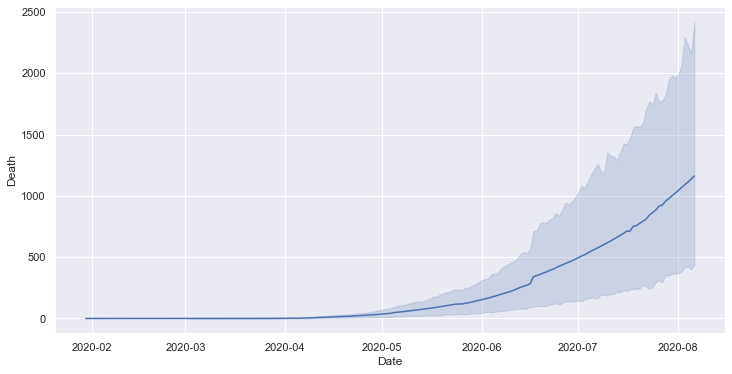

In [40]:
sns.set(rc = {'figure.figsize' : (12,6)})
sns.lineplot(x= "Date", y = "Death", data = covid_data)

> Theres a steady increase in death count from `fourth` month (05-2020) onwards and the death toll climbs sharply from the fifth month onwards (thats when the total cases also started increasing).

* 3.) `Univariate` Time series analysis for Cured/Discharged/Migrated

<AxesSubplot:xlabel='Date', ylabel='Cured/Discharged/Migrated'>

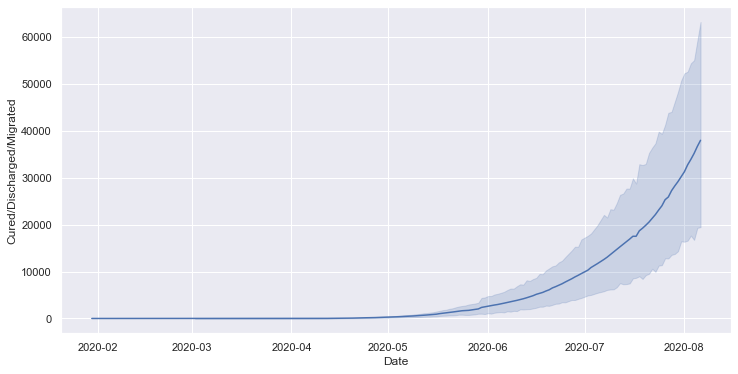

In [41]:
sns.set(rc = {'figure.figsize' : (12,6)})
sns.lineplot(x= "Date", y = "Cured/Discharged/Migrated", data = covid_data)

> Here we can see that , the number of people recovering from Covid is also on the raise. This is a good factor.

Histograms for various data features

array([[<AxesSubplot:title={'center':'Date'}>,
        <AxesSubplot:title={'center':'Total Confirmed cases'}>,
        <AxesSubplot:title={'center':'Death'}>],
       [<AxesSubplot:title={'center':'Cured/Discharged/Migrated'}>,
        <AxesSubplot:title={'center':'New cases'}>,
        <AxesSubplot:title={'center':'New recovered'}>],
       [<AxesSubplot:title={'center':'Active_cases'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

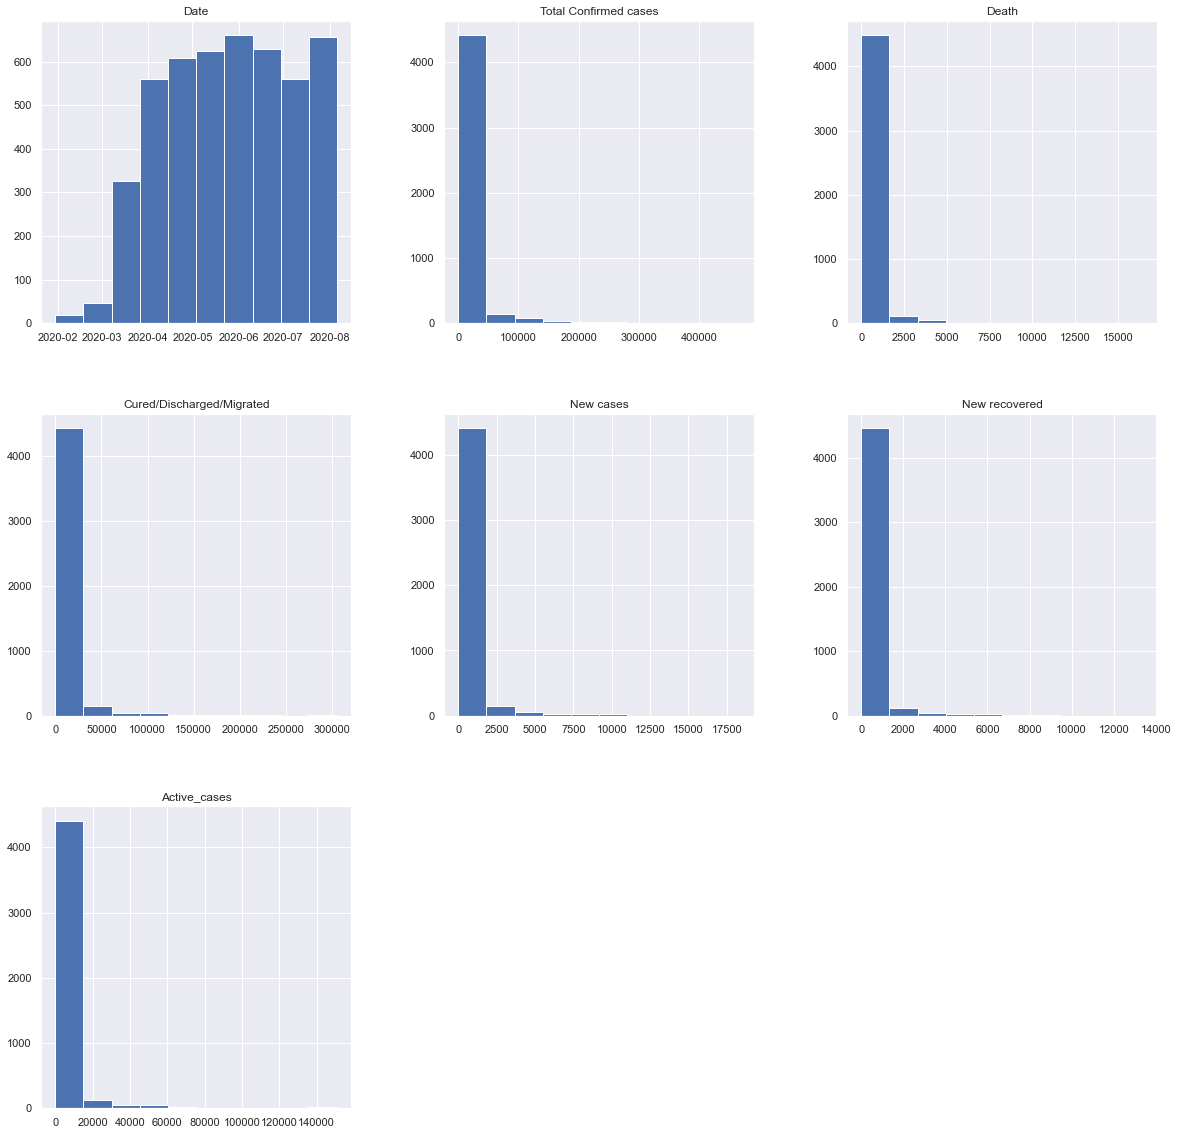

In [42]:
covid_data.hist(figsize=(20,20))

### **3b.)** Performing some **Bivariate analysis**

* Plotting a scatter plot between `Total Confirmed cases` and `Cured/Discharged/Migrated`

<AxesSubplot:xlabel='Total Confirmed cases', ylabel='Cured/Discharged/Migrated'>

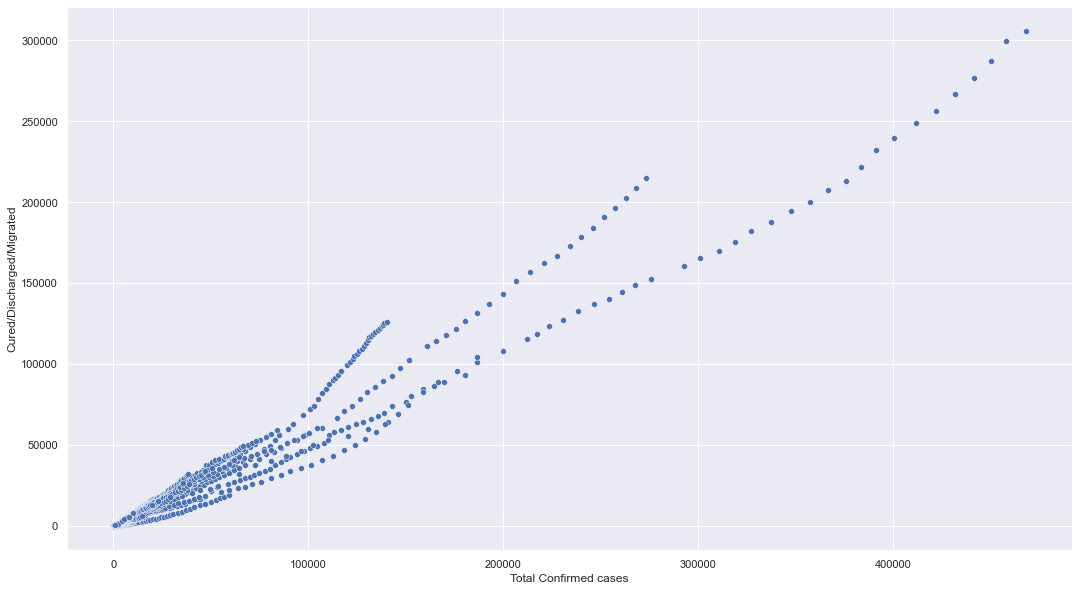

In [43]:
plt.figure(figsize=(18,10))
sns.scatterplot(x = "Total Confirmed cases", y = "Cured/Discharged/Migrated",data = covid_data)

> The good thing we can notice here is that: as the total number of cases increases, the number of people recovering also increases.

> In the initial stages the recovery rate was low but as the time passed the number of people recovering also increased,

* Plotting a scatter plot between `Total Confirmed cases` and `Death`feature

<AxesSubplot:xlabel='Total Confirmed cases', ylabel='Death'>

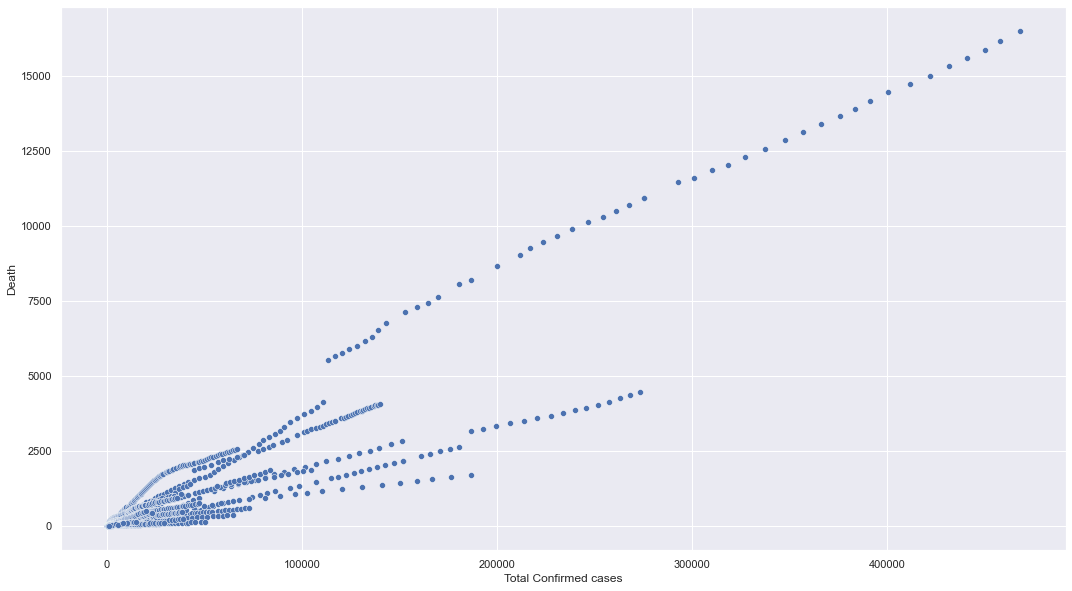

In [44]:
plt.figure(figsize=(18,10))
sns.scatterplot(x = "Total Confirmed cases", y = "Death",data = covid_data)

> The worrying part of the data is that : With the increase in cases the Death toll also increased.

## 4. Modelling

[NOTE : We have already created a Random Forest in the earlier stages using the original dataset, as outliers don't affect RF models ]

Here, we'll be making more models to see which model will be a better fit.

[Note : We'll be using the outlier removed dataset for the following models, i.e. " covid_data1 "]

In [45]:
covid_data1.head()

,Date,Name of State / UT,Total Confirmed cases,Death,Cured/Discharged/Migrated,New cases,New recovered,Active_cases
0,2020-01-30,Kerala,0.000000,0.0,0.0,0.000,0.166667,0.001176
1,2020-01-31,Kerala,0.000000,0.0,0.0,0.000,0.166667,0.001176
2,2020-02-01,Kerala,0.000441,0.0,0.0,0.025,0.166667,0.002353
3,2020-02-02,Kerala,0.000882,0.0,0.0,0.025,0.166667,0.003529
4,2020-02-03,Kerala,0.000882,0.0,0.0,0.000,0.166667,0.003529


In this model we'll be trying to predict the **Death** count feature 

In [46]:
# Selecting our dependent and independent variables

X = covid_data1.drop(['Date', 'Name of State / UT', 'Death'], axis = 1)
y = covid_data1['Death']

# Splitting and training our cleaned dataset

X_train,X_test,y_train,y_test=train_test_split(X, y ,test_size=0.25,random_state=150)
X_train.head()

,Total Confirmed cases,Cured/Discharged/Migrated,New cases,New recovered,Active_cases
1486,0.003088,0.003117,0.00,0.500000,0.003529
92,0.000000,0.000000,0.00,0.166667,0.001176
2219,0.000000,0.000623,0.00,0.166667,0.000000
1372,0.017203,0.010599,0.25,0.166667,0.027059
1177,0.000000,0.000623,0.00,0.333333,0.000000


### 1) Linear Regression Model

In [47]:
from sklearn.linear_model import LinearRegression

## create an instance of the class LinearRegression, which will represent the regression model:

lr_model = LinearRegression()
lr_model.fit(X_train,y_train)
r_sq = lr_model.score(X_train,y_train)

print('coefficient of determination:', r_sq)
print('\nintercept:', lr_model.intercept_)
print('\nslope:', lr_model.coef_)

y_pred = lr_model.predict(X_test)

from math import sqrt

print("\nMAE = ", mean_absolute_error(y_test,y_pred))
print("\nMSE = ", mean_squared_error(y_test,y_pred))
print("\nR2 Value = ", r2_score(y_test,y_pred))
print("\nAdjusted R2 = ", 1 - (1-lr_model.score(X, y))*(len(y)-1)/(len(y)-X.shape[1]-1))

print('\npredicted response:', y_pred, sep='\n')

coefficient of determination: 1.0

intercept: 0.10000000000000339

slope: [ 2.26700000e+02 -1.60400000e+02 -4.07997791e-14 -8.49783170e-15
 -8.50000000e+01]

MAE =  5.432499850694647e-15

MSE =  9.719221132263873e-29

R2 Value =  1.0

Adjusted R2 =  1.0

predicted response:
[ 6.00000000e-01  2.00000000e-01  2.19269047e-15  2.09554596e-15
  1.00000000e-01  1.00000000e-01  2.15105711e-15  1.00000000e-01
  9.00000000e-01  8.00000000e-01  1.13797860e-15 -5.87030424e-15
  8.46545056e-16  2.06779038e-15  2.09554596e-15  6.10622664e-16
 -8.60422844e-16  2.35922393e-15  1.00000000e-01  2.09554596e-15
 -8.24340596e-15  2.05391260e-15  6.93889390e-17  3.00000000e-01
  1.00000000e-01  1.00000000e-01  2.09554596e-15  1.00000000e-01
  3.66373598e-15 -6.09234885e-15  4.00000000e-01  1.00000000e-01
  2.19269047e-15  1.00000000e+00  7.07767178e-16  2.91433544e-15
  2.15105711e-15  2.06779038e-15  2.09554596e-15  2.10942375e-15
  2.17881269e-15  1.00000000e-01  3.00000000e-01  2.12330153e-15
  1.000000

> Based on the performance metrics score , the Linear Regression model seems to be apt for this model.

### 2) KNN Model

Text(0, 0.5, 'mse')

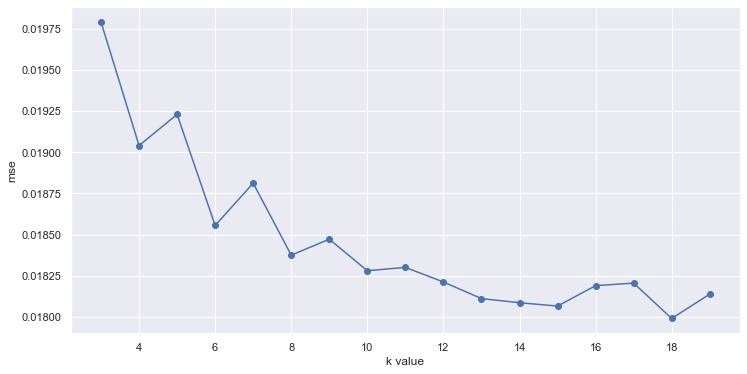

In [48]:
from sklearn.neighbors import KNeighborsRegressor

mse_val = []
neighbors = np.arange(3,20) 
for k in neighbors:
    #creating an instance for knn
    regressor = KNeighborsRegressor(n_neighbors=k,metric = "minkowski") # mentioning the k values , 
    # and type of distance measurement
    regressor.fit(X_train,y_train)
    predicts = regressor.predict(X_test) #Here we've finished building the model.
    # Next, we append the mse values to the empty list, to find the minimum mse value
    mse = mean_squared_error(y_test,predicts)
    mse_val.append(mse)


plt.plot(neighbors,mse_val,"o-") # o- will plot with a line joining all the dots
plt.xlabel("k value")
plt.ylabel("mse")

In [49]:
from sklearn.neighbors import KNeighborsRegressor
knn_model = KNeighborsRegressor(n_neighbors=18)
knn_model.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=18)

In [50]:
from sklearn.metrics import mean_squared_error
from math import sqrt
train_preds = knn_model.predict(X_train)
mse = mean_squared_error(y_train, train_preds)
rmse = sqrt(mse)
rmse

0.11881850469225551

In [51]:
test_preds = knn_model.predict(X_test)
mse = mean_squared_error(y_test, test_preds)
rmse = sqrt(mse)
rmse

0.1341212677794052

In [52]:
print("MAE = ", mean_absolute_error(y_test,test_preds))
print("MSE = ", mean_squared_error(y_test,test_preds))
print("RMSE = ", rmse)
print("R2 Value = ", r2_score(y_test,test_preds))
print("Adjusted R2 = ", 1 - (1-knn_model.score(X, y))*(len(y)-1)/(len(y)-X.shape[1]-1))

MAE =  0.07370218579234973
MSE =  0.01798851447075491
RMSE =  0.1341212677794052
R2 Value =  0.33374546015349615
Adjusted R2 =  0.4146159510589178


> This model is not Suitable for prediction.

### 3.) SVR

In [53]:
from sklearn.svm import SVR


Linear SVR

In [54]:
svm_linear = SVR(kernel= "linear") # selecting the linear kernel
svm_linear.fit(X_train,y_train)
svm_pred = svm_linear.predict(X_test)

rmse = sqrt(mean_squared_error(y_test,svm_pred))

print("MAE = ", mean_absolute_error(y_test,svm_pred))
print("MSE = ", mean_squared_error(y_test,svm_pred))
print("RMSE = ", rmse)
print("R2 Value = ", r2_score(y_test,svm_pred))
print("Adjusted R2 = ", 1 - (1-svm_linear.score(X, y))*(len(y)-1)/(len(y)-X.shape[1]-1))

MAE =  0.10311672998550532
MSE =  0.021043954572996973
RMSE =  0.14506534587211714
R2 Value =  0.22057875910892621
Adjusted R2 =  0.2161169798884599


POLYNOMIAL SVM

In [55]:
svm_poly = SVR(kernel= "poly") # selecting the linear kernel
svm_poly.fit(X_train,y_train)
svm_p_pred = svm_poly.predict(X_test)

rmse = sqrt(mean_squared_error(y_test,svm_p_pred))

print("MAE = ", mean_absolute_error(y_test,svm_p_pred))
print("MSE = ", mean_squared_error(y_test,svm_p_pred))
print("RMSE = ", rmse)
print("R2 Value = ", r2_score(y_test,svm_p_pred))
print("Adjusted R2 = ", 1 - (1-svm_poly.score(X, y))*(len(y)-1)/(len(y)-X.shape[1]-1))

MAE =  0.1099880078681552
MSE =  0.02559903737911764
RMSE =  0.15999699178146332
R2 Value =  0.051868629993562676
Adjusted R2 =  0.23272677771961314


RBF SVM

In [56]:
svm_radial = SVR(kernel="rbf")
svm_radial.fit(X_train,y_train)
svm_r_pred = svm_radial.predict(X_test)

rmse = sqrt(mean_squared_error(y_test,svm_r_pred))

print("MAE = ", mean_absolute_error(y_test,svm_r_pred))
print("MSE = ", mean_squared_error(y_test,svm_r_pred))
print("RMSE = ", rmse)
print("R2 Value = ", r2_score(y_test,svm_r_pred))
print("Adjusted R2 = ", 1 - (1-svm_radial.score(X, y))*(len(y)-1)/(len(y)-X.shape[1]-1))

MAE =  0.10917143782187146
MSE =  0.022823226785842872
RMSE =  0.15107358070107055
R2 Value =  0.1546784763836031
Adjusted R2 =  0.32839907713513816


> Linear , Polynomial, RBF kernel based SVM Regression model gives us low performance scores hence they can be avoided.

### 4.) Decision tree Regression model

In [57]:
from sklearn.tree import DecisionTreeRegressor

dt_model = DecisionTreeRegressor()
dt_model.fit(X_train,y_train)
dt_pred = dt_model.predict(X_test)

rmse = sqrt(mean_squared_error(y_test,dt_pred))

print("MAE = ", mean_absolute_error(y_test,dt_pred))
print("MSE = ", mean_squared_error(y_test,dt_pred))
print("RMSE = ", rmse)
print("R2 Value = ", r2_score(y_test,dt_pred))

MAE =  0.055327868852459015
MSE =  0.01758196721311476
RMSE =  0.13259701057382386
R2 Value =  0.348803065744289


> This too is not an ideal model

### 5.) Random Forest Regression Model

In [58]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor()
rf_model.fit(X_train,y_train)
rf_pred = rf_model.predict(X_test)

rmse = sqrt(mean_squared_error(y_test,rf_pred))

print("MAE = ", mean_absolute_error(y_test,rf_pred))
print("MSE = ", mean_squared_error(y_test,rf_pred))
print("RMSE = ", rmse)
print("R2 Value = ", r2_score(y_test,rf_pred))

MAE =  0.05527254098360657
MSE =  0.012828932377049181
RMSE =  0.11326487706720553
R2 Value =  0.5248448974767332


In [59]:
pd.Series(rf_model.feature_importances_,index = X.columns).sort_values(ascending=False)*100

Total Confirmed cases        46.196959
Cured/Discharged/Migrated    22.151600
Active_cases                 20.642258
New cases                     7.311775
New recovered                 3.697408
dtype: float64

In [60]:
# Changing the Hyper parameters and checking the results

rf1 = RandomForestRegressor(n_estimators=800, max_depth=10,random_state=150)
rf1.fit(X_train,y_train)
predict1 = rf1.predict(X_test)
rmse = sqrt(mean_squared_error(y_test,predict1))

print("MAE = ", mean_absolute_error(y_test,predict1))
print("MSE = ", mean_squared_error(y_test,predict1))
print("RMSE = ", rmse)
print("R2 Value = ", r2_score(y_test,predict1))

MAE =  0.0599041722664826
MSE =  0.013193098412519918
RMSE =  0.11486121369949004
R2 Value =  0.5113569980292977


> Adjusting the Hyper parameters is not helping improve accuracy

### 6.) Gradient Boosting Model

In [61]:
from sklearn.ensemble import GradientBoostingRegressor

gb = GradientBoostingRegressor()
gb.fit(X_train,y_train)
gb_pred = gb.predict(X_test)

rmse = sqrt(mean_squared_error(y_test,gb_pred))

print("MAE = ", mean_absolute_error(y_test,gb_pred))
print("MSE = ", mean_squared_error(y_test,gb_pred))
print("RMSE = ", rmse)
print("R2 Value = ", r2_score(y_test,gb_pred))

MAE =  0.07024551172599783
MSE =  0.015616923026512965
RMSE =  0.12496768792977234
R2 Value =  0.42158392891400254


> Not ideal as the performance metrics values are low

### 7.) Extreme gradient boosting Model

In [62]:
import xgboost as xgb
from xgboost import XGBRegressor

xgb = XGBRegressor()
xgb.fit(X_train,y_train)
xgb_pred = xgb.predict(X_test)

rmse = sqrt(mean_squared_error(y_test,xgb_pred))

print("MAE = ", mean_absolute_error(y_test,xgb_pred))
print("MSE = ", mean_squared_error(y_test,xgb_pred))
print("RMSE = ", rmse)
print("R2 Value = ", r2_score(y_test,xgb_pred))

MAE =  0.05634741004014061
MSE =  0.014702436356081742
RMSE =  0.12125360347668741
R2 Value =  0.4554544798588548


> This model too has a poor performance metrics.

* After analysing all the above models we can say that : A **linear Regression model** fits our purpose most accuaretly in the current scenario.

## 5.) Model Fine Tuning : 

> Our Linear Regression Model doesnt need any further tuning, as we've got a good performace scores